In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [6]:
df_train = pd.read_csv('train_loan.csv')
df_test = pd.read_csv('test_loan.csv')
df=df_train.copy()

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
#check for missing values in train dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#Let's fill those missing values
#One approach to imputing categorical features is to replace missing values with the most common class.

In [13]:
#Let's start with Gender

In [14]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [15]:
temp = df.groupby('Gender')['Loan_ID'].nunique()
print (temp)

Gender
Female    112
Male      489
Name: Loan_ID, dtype: int64


In [16]:
class ChainedAssignent:
    def __init__(self, chained=None):
        acceptable = [None, 'warn', 'raise']
        assert chained in acceptable, "chained must be in " + str(acceptable)
        self.swcw = chained

    def __enter__(self):
        self.saved_swcw = pd.options.mode.chained_assignment
        pd.options.mode.chained_assignment = self.swcw
        return self

    def __exit__(self, *args):
        pd.options.mode.chained_assignment = self.saved_swcw

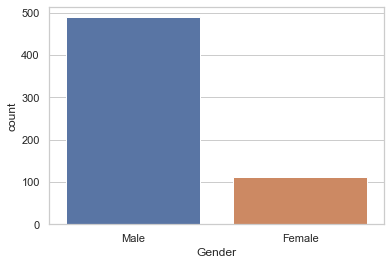

In [17]:
sns.countplot(x='Gender',data=df)

In [18]:
#Male is most common class, so let's fill missing values for Column Gender to Male
with ChainedAssignent():
    df['Gender'][df['Gender'].isnull()]='Male'

In [19]:
#Let's fill missing values for the column Married

In [20]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [21]:
temp1 = df.groupby('Married')['Loan_ID'].nunique()
print (temp1)

Married
No     213
Yes    398
Name: Loan_ID, dtype: int64


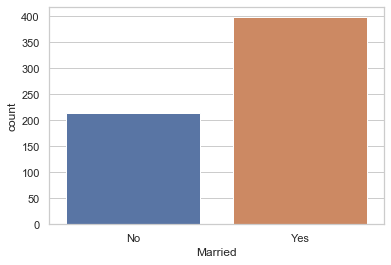

In [22]:
sns.countplot(x='Married',data=df)

In [23]:
#Yes is most common class, so let's fill missing values for Column Married to Yes
with ChainedAssignent():
    df['Married'][df['Married'].isnull()]='Yes'

In [24]:
#Let's fill missing values for the column Dependents

In [25]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [26]:
temp2 = df.groupby('Dependents')['Loan_ID'].nunique()
print (temp2)

Dependents
0     345
1     102
2     101
3+     51
Name: Loan_ID, dtype: int64


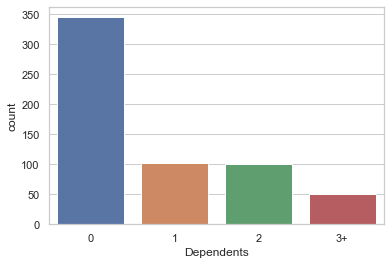

In [27]:
sns.countplot(x='Dependents',data=df)

In [28]:
#0 is most common class, so let's fill missing values for Column Dependents to 0
with ChainedAssignent():
    df['Dependents'][df['Dependents'].isnull()]='0'

In [29]:
#Let's fill missing values for the column Self_Employed

In [30]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [31]:
temp3 = df.groupby('Self_Employed')['Loan_ID'].nunique()
print (temp3)

Self_Employed
No     500
Yes     82
Name: Loan_ID, dtype: int64


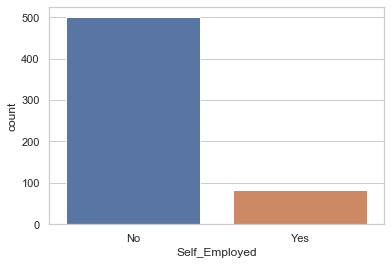

In [32]:
sns.countplot(x='Self_Employed',data=df)

In [33]:
#No is most common class, so let's fill missing values for Column Self_Employed to No
with ChainedAssignent():
    df['Self_Employed'][df['Self_Employed'].isnull()]='No'

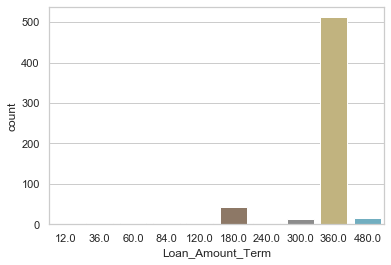

In [34]:
#Let's fill missing values for the column LoanAmount Term
sns.countplot(x='Loan_Amount_Term',data=df)

In [35]:
with ChainedAssignent():
    df['Loan_Amount_Term'][df['Loan_Amount_Term'].isnull()]='360'

In [36]:
#Let's fill missing values for the column Loan_Amount   

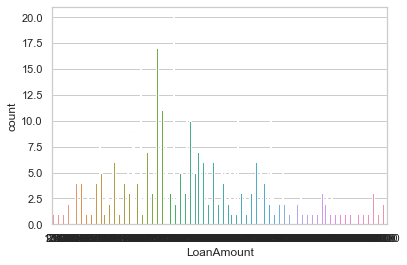

In [37]:
sns.countplot(x='LoanAmount',data=df)

In [38]:
#Let's fill the missing values with the mean

In [39]:
with ChainedAssignent():
    df['LoanAmount'][df['LoanAmount'].isnull()]= df['LoanAmount'].mean()

In [40]:
#Let's fill missing values for the column Credit_History       

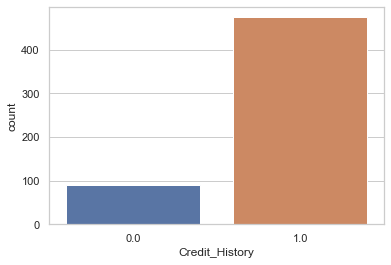

In [41]:
sns.countplot(x='Credit_History',data=df)

In [42]:
#1 is most common class, so let's fill missing values for Column Credit_History to 1
with ChainedAssignent():
    df['Credit_History'][df['Credit_History'].isnull()]='1'

In [43]:
#All missing values were filled
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [44]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [45]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360,1,Urban,Y


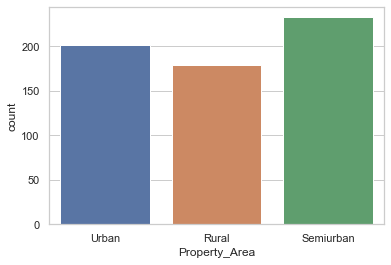

In [46]:
sns.countplot(x='Property_Area',data=df)

In [47]:
#Let's transform categorical data to numeric format

In [48]:
#Gender
df.loc[df.Gender=='Male','Gender']= 0
df.loc[df.Gender=='Female','Gender']=1

In [49]:
#Married
df.loc[df.Married=='No','Married']= 0
df.loc[df.Married=='Yes','Married']=1

In [239]:
#Education
df.loc[df.Education=='Graduate','Education']= 1
df.loc[df.Education=='Not Graduate','Education']=0

In [240]:
#Self_Employed
df.loc[df.Self_Employed=='No','Self_Employed']= 0
df.loc[df.Self_Employed=='Yes','Self_Employed']=1

In [241]:
#Property_Area
df.loc[df.Property_Area=='Urban','Property_Area']= 2
df.loc[df.Property_Area=='Rural','Property_Area']=0
df.loc[df.Property_Area=='Semiurban','Property_Area']=1

In [283]:
#Loan_Status
df.loc[df.Loan_Status=='N','Loan_Status']= 0
df.loc[df.Loan_Status=='Y','Loan_Status']=1

In [284]:
df.loc[df.Dependents=='3+','Dependents']= 5

In [285]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360,1,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360,1,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360,1,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360,1,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360,1,2,1


In [286]:
#Manually gave numeric labels as we have very less number of classes
#If we have more, we can do dummy encoding
#Now our data is free from missing values and categorical values are converted to numerical format

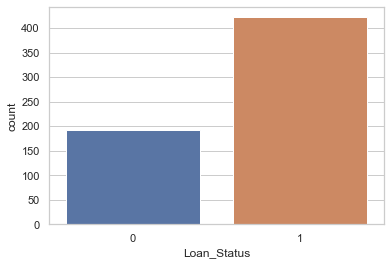

In [287]:
sns.countplot(x='Loan_Status',data=df)

In [498]:
df1=df.drop(['Loan_ID'],axis=1)
IT= df1.drop(['Loan_Status'],axis=1)
TT = df1.filter(['Loan_Status'],axis=1)
TT=TT.astype('int')
#train=70,dev=20,test=10
x, x_test, y, y_test = train_test_split(InputTable,TargetTable,test_size=0.1,train_size=0.9)
x_train, x_dev, y_train, y_dev = train_test_split(x,y,test_size = 0.22,train_size =0.78)

In [585]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train.values.ravel())
y_pred_train= logreg.predict(x_train)
y_pred_test = logreg.predict(x_test)
y_pred_dev= logreg.predict(x_dev)

In [587]:
print("Accuracy of LR train:",accuracy_score(y_train, y_pred_train))

Accuracy of LR train: 0.8046511627906977


In [588]:
print("Accuracy of LR dev:",accuracy_score(y_dev, y_pred_dev))

Accuracy of LR dev: 0.819672131147541


In [589]:
DTC = DecisionTreeClassifier()
DTC= DTC.fit(x_train,y_train)
y_pred_train= DTC.predict(x_train)
y_pred_test = DTC.predict(x_test)
y_pred_dev= DTC.predict(x_dev)

In [590]:
print("Accuracy of DTC train:",accuracy_score(y_train, y_pred_train))

Accuracy of DTC train: 1.0


In [591]:
print("Accuracy of DTC dev:",accuracy_score(y_dev, y_pred_dev))

Accuracy of DTC dev: 0.7377049180327869


In [514]:
# Let's check the error at different depths
train=[]
dev=[]
for i in range(1,10):
    dec = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', random_state = 5, max_depth=i)
    dec.fit(x_train, y_train)
    train.append(1-metrics.accuracy_score(dec.predict(x_train), y_train))
    dev.append(1-metrics.accuracy_score(dec.predict(x_dev), y_dev))

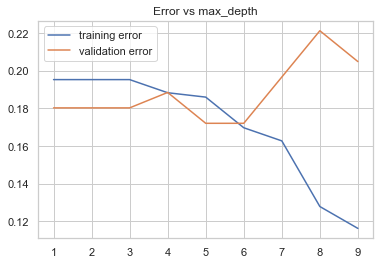

In [515]:
plt.title('Error vs max_depth')
depth=[i for i in range(1,10)]
plt.plot(depth,train,label = 'training error')
plt.plot(depth,dev, label = 'validation error')
plt.legend()

In [592]:
DTC1=DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', random_state = 10, max_depth=5)
DTC1= DTC1.fit(x_train,y_train)
y_pred_train= DTC1.predict(x_train)
y_pred_test = DTC1.predict(x_test)
y_pred_dev= DTC1.predict(x_dev)

In [593]:
print("Accuracy of DTC train:",accuracy_score(y_train, y_pred_train))

Accuracy of DTC train: 0.8255813953488372


In [594]:
print("Accuracy of DTC dev:",accuracy_score(y_dev, y_pred_dev))

Accuracy of DTC dev: 0.8114754098360656


In [595]:
clf1 = RandomForestClassifier(criterion = 'gini',max_features = 'log2',n_estimators = 50,random_state=5, max_depth = 5)
clf1.fit(x_train,y_train.values.ravel())
y_pred_train= clf1.predict(x_train)
y_pred_test = clf1.predict(x_test)
y_pred_dev= clf1.predict(x_dev)

In [596]:
print("Accuracy of RFC train:",accuracy_score(y_train, y_pred_train))

Accuracy of RFC train: 0.827906976744186


In [597]:
print("Accuracy of RFC dev:",accuracy_score(y_dev, y_pred_dev))

Accuracy of RFC dev: 0.819672131147541


In [528]:
train=[]
dev=[]
for i in range(1,10):
    rfc = RandomForestClassifier(criterion = 'entropy',max_features = 'log2', random_state = 5, max_depth=i)
    rfc.fit(x_train, y_train.values.ravel())
    train.append(1-metrics.accuracy_score(rfc.predict(x_train), y_train))
    dev.append(1-metrics.accuracy_score(rfc.predict(x_dev), y_dev))

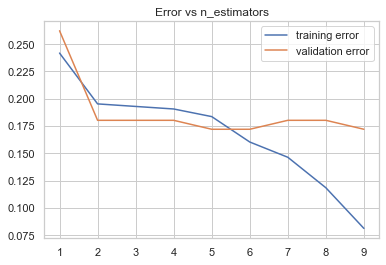

In [530]:
plt.title('Error vs n_estimators')
depth=[i for i in range(1,10)]
plt.plot(depth,train,label = 'training error')
plt.plot(depth,dev, label = 'validation error')
plt.legend()

In [598]:
clf1 = RandomForestClassifier(criterion = 'gini',max_features = 'log2',n_estimators = 100,random_state=10, max_depth = 9)
clf1.fit(x_train,y_train.values.ravel())
y_pred_train= clf1.predict(x_train)
y_pred_test = clf1.predict(x_test)
y_pred_dev= clf1.predict(x_dev)

In [599]:
print("Accuracy of RFC train:",accuracy_score(y_train, y_pred_train))

Accuracy of RFC train: 0.9325581395348838


In [600]:
print("Accuracy of RFC dev:",accuracy_score(y_dev, y_pred_dev))

Accuracy of RFC dev: 0.819672131147541


In [601]:
from sklearn.ensemble import AdaBoostClassifier
adaB = AdaBoostClassifier(n_estimators=15, random_state=0)
adaB.fit(x_train,y_train.values.ravel())
y_pred_train= adaB.predict(x_train)
y_pred_test = adaB.predict(x_test)
y_pred_dev= adaB.predict(x_dev)

In [602]:
print("Accuracy of AdaB train:",accuracy_score(y_train, y_pred_train))

Accuracy of AdaB train: 0.8186046511627907


In [603]:
print("Accuracy of AdaB dev:",accuracy_score(y_dev, y_pred_dev))

Accuracy of AdaB dev: 0.7950819672131147


In [543]:
train=[]
dev=[]
for i in range(1,17):
    adaB = AdaBoostClassifier(n_estimators=i, random_state=0)
    adaB.fit(x_train,y_train.values.ravel())
    train.append(1-metrics.accuracy_score(adaB.predict(x_train), y_train))
    dev.append(1-metrics.accuracy_score(adaB.predict(x_dev), y_dev)) 

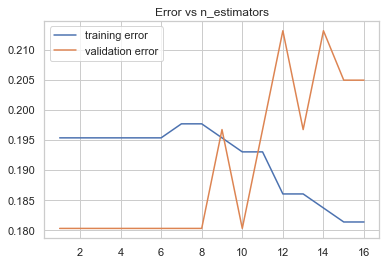

In [544]:
plt.title('Error vs n_estimators')
depth=[i for i in range(1,17)]
plt.plot(depth,train,label = 'training error')
plt.plot(depth,dev, label = 'validation error')
plt.legend()

In [604]:
adaB = AdaBoostClassifier(n_estimators=2, random_state=10)
adaB.fit(x_train,y_train.values.ravel())
y_pred_train= adaB.predict(x_train)
y_pred_test = adaB.predict(x_test)
y_pred_dev= adaB.predict(x_dev)

In [605]:
print("Accuracy of AdaB train:",accuracy_score(y_train, y_pred_train))

Accuracy of AdaB train: 0.8046511627906977


In [606]:
print("Accuracy of AdaB dev:",accuracy_score(y_dev, y_pred_dev))

Accuracy of AdaB dev: 0.819672131147541


In [607]:
from sklearn.ensemble import GradientBoostingClassifier
gdBoost = GradientBoostingClassifier(n_estimators=50, random_state=0)
gdBoost.fit(x_train,y_train.values.ravel())
y_pred_train= gdBoost.predict(x_train)
y_pred_test = gdBoost.predict(x_test)
y_pred_dev= gdBoost.predict(x_dev)

In [608]:
print("Accuracy of gdboost train:",accuracy_score(y_train, y_pred_train))

Accuracy of gdboost train: 0.858139534883721


In [609]:
print("Accuracy of gdboost dev:",accuracy_score(y_dev, y_pred_dev))

Accuracy of gdboost dev: 0.8114754098360656


In [610]:
# Let's evaluate the models using the test set
models = ['logreg', 'DTC1','clf1','adaB','gdBoost']
print('{:<18s}{:>15s}{:>15s}{:>15s}{:>15s}'.format("Model","Accuracy","Precision","Recall","F1 score"))
print()
for i in models:
    y_pred = eval(i).predict(x_test)
    print('{:<18s}{:>15.2f}{:>15.2f}{:>15.2f}{:>15.2f}'.
          format(i,
                 metrics.accuracy_score(y_test,y_pred),
                 metrics.precision_score(y_test,y_pred),
                 metrics.recall_score(y_test,y_pred),
                 metrics.f1_score(y_test,y_pred)))

Model                    Accuracy      Precision         Recall       F1 score

logreg                       0.82           0.79           1.00           0.88
DTC1                         0.82           0.79           1.00           0.88
clf1                         0.82           0.79           1.00           0.88
adaB                         0.82           0.79           1.00           0.88
gdBoost                      0.81           0.78           0.98           0.87


In [4]:
from sklearn.ensemble import BaggingClassifier
seed = 1075
np.random.seed(seed)

In [ ]:
models = ['logreg', 'DTC1','clf1','adaB','gdBoost']
bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, max_features=10, random_state=seed)
print('{:<18s}{:>15s}{:>15s}{:>15s}{:>15s}'.format("Model","Accuracy","Precision","Recall","F1 score"))
print()
for i in models:
    y_pred = eval(i).predict(x_test)
    print('{:<18s}{:>15.2f}{:>15.2f}{:>15.2f}{:>15.2f}'.
          format(i,
                 metrics.accuracy_score(y_test,y_pred),
                 metrics.precision_score(y_test,y_pred),
                 metrics.recall_score(y_test,y_pred),
                 metrics.f1_score(y_test,y_pred)))

In [ ]:
bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, max_features=10, random_state=seed)